In [1]:
cd ../

C:\Users\mvill\Desktop\School\KaggleHackTheHuman_2022


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 7682-30C3

 Directory of C:\Users\mvill\Desktop\School\KaggleHackTheHuman_2022

07/12/2022  18:21    <DIR>          .
07/12/2022  18:21    <DIR>          ..
07/12/2022  18:21             1,970 .gitignore
07/12/2022  18:21            45,873 inference-fastai-baseline.ipynb
07/12/2022  18:26    <DIR>          ipynbs
07/12/2022  18:21               296 README.md
07/12/2022  18:21                21 sample_submission.csv
07/12/2022  18:21               111 test.csv
07/12/2022  18:21        16,367,208 train.csv
               6 File(s)     16,415,479 bytes
               3 Dir(s)  80,626,569,216 bytes free


In [4]:
training = pd.read_csv("train.csv")

In [5]:
test = pd.read_csv("test.csv")

In [20]:
training

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
0,10044,prostate,HPA,3000,3000,0.4,4,1459676 77 1462675 82 1465674 87 1468673 92 14...,37.0,Male
1,10274,prostate,HPA,3000,3000,0.4,4,715707 2 718705 8 721703 11 724701 18 727692 3...,76.0,Male
2,10392,spleen,HPA,3000,3000,0.4,4,1228631 20 1231629 24 1234624 40 1237623 47 12...,82.0,Male
3,10488,lung,HPA,3000,3000,0.4,4,3446519 15 3449517 17 3452514 20 3455510 24 34...,78.0,Male
4,10610,spleen,HPA,3000,3000,0.4,4,478925 68 481909 87 484893 105 487863 154 4908...,21.0,Female
...,...,...,...,...,...,...,...,...,...,...
346,9517,kidney,HPA,3000,3000,0.4,4,1611763 11 1614753 29 1617750 35 1620746 43 16...,61.0,Male
347,9769,kidney,HPA,3070,3070,0.4,4,4030400 28 4033466 34 4036526 48 4039594 54 40...,28.0,Male
348,9777,largeintestine,HPA,3000,3000,0.4,4,538473 13 541468 22 544463 30 547461 35 550459...,84.0,Male
349,9791,kidney,HPA,3000,3000,0.4,4,334733 33 337729 43 340729 43 343725 51 346723...,28.0,Male


In [19]:
training.describe

<bound method NDFrame.describe of         id           organ data_source  img_height  img_width  pixel_size  \
0    10044        prostate         HPA        3000       3000         0.4   
1    10274        prostate         HPA        3000       3000         0.4   
2    10392          spleen         HPA        3000       3000         0.4   
3    10488            lung         HPA        3000       3000         0.4   
4    10610          spleen         HPA        3000       3000         0.4   
..     ...             ...         ...         ...        ...         ...   
346   9517          kidney         HPA        3000       3000         0.4   
347   9769          kidney         HPA        3070       3070         0.4   
348   9777  largeintestine         HPA        3000       3000         0.4   
349   9791          kidney         HPA        3000       3000         0.4   
350   9904  largeintestine         HPA        3000       3000         0.4   

     tissue_thickness                    

In [16]:
training.shape

(351, 10)

In [32]:
training

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
0,10044,prostate,HPA,3000,3000,0.4,4,1459676 77 1462675 82 1465674 87 1468673 92 14...,37.0,Male
1,10274,prostate,HPA,3000,3000,0.4,4,715707 2 718705 8 721703 11 724701 18 727692 3...,76.0,Male
2,10392,spleen,HPA,3000,3000,0.4,4,1228631 20 1231629 24 1234624 40 1237623 47 12...,82.0,Male
3,10488,lung,HPA,3000,3000,0.4,4,3446519 15 3449517 17 3452514 20 3455510 24 34...,78.0,Male
4,10610,spleen,HPA,3000,3000,0.4,4,478925 68 481909 87 484893 105 487863 154 4908...,21.0,Female
...,...,...,...,...,...,...,...,...,...,...
346,9517,kidney,HPA,3000,3000,0.4,4,1611763 11 1614753 29 1617750 35 1620746 43 16...,61.0,Male
347,9769,kidney,HPA,3070,3070,0.4,4,4030400 28 4033466 34 4036526 48 4039594 54 40...,28.0,Male
348,9777,largeintestine,HPA,3000,3000,0.4,4,538473 13 541468 22 544463 30 547461 35 550459...,84.0,Male
349,9791,kidney,HPA,3000,3000,0.4,4,334733 33 337729 43 340729 43 343725 51 346723...,28.0,Male


In [49]:
3000 * 3000

9000000

In [57]:
training["rle"][300][-25:]

' 50 8422377 47 8425383 34'

In [31]:
training["id"]

0      10044
1      10274
2      10392
3      10488
4      10610
       ...  
346     9517
347     9769
348     9777
349     9791
350     9904
Name: id, Length: 351, dtype: int64

In [37]:
training["organ"].describe()

count        351
unique         5
top       kidney
freq          99
Name: organ, dtype: object

In [39]:
training["organ"] = training["organ"].astype("category")

In [44]:
training["organ"].describe()

count        351
unique         5
top       kidney
freq          99
Name: organ, dtype: object

(array([93.,  0., 53.,  0.,  0., 48.,  0., 99.,  0., 58.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

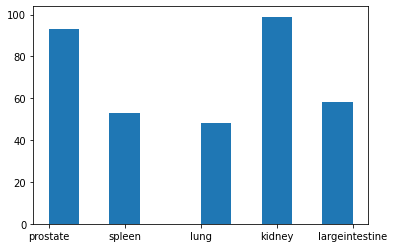

In [43]:
plt.hist(list(training["organ"]))

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

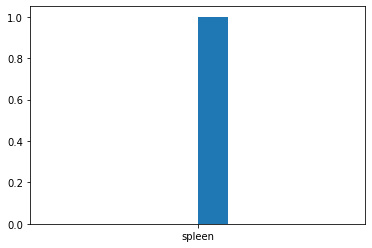

In [48]:
plt.hist(list(test["organ"]))

(array([13., 12., 10., 23., 28., 64., 72., 31., 39., 59.]),
 array([21. , 27.3, 33.6, 39.9, 46.2, 52.5, 58.8, 65.1, 71.4, 77.7, 84. ]),
 <BarContainer object of 10 artists>)

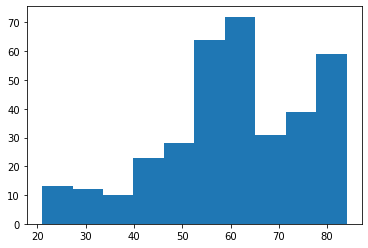

In [45]:
plt.hist(list(training["age"]))

(array([229.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 122.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

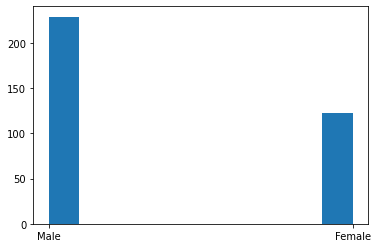

In [46]:
plt.hist(list(training["sex"]))

In [33]:
print("n = " + str(training.shape[0]))
print(sum(training["pixel_size"] == 0.4))
print(sum(training["img_height"] == 3000))
print(sum(training["img_width"] == 3000))
print(sum(training["tissue_thickness"] == 4))
print(sum(training["data_source"] == "HPA"))
print

n = 351
351
326
326
351
351


In [120]:
qq = list(training[temp]["age"])
qq.sort()
print(qq)

[21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 70.0, 70.0, 72.0, 72.0, 72.0, 72.0, 72.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0]


(array([ 7.,  0.,  0.,  0.,  9., 13.,  0.,  0., 17.,  7.]),
 array([21. , 27.1, 33.2, 39.3, 45.4, 51.5, 57.6, 63.7, 69.8, 75.9, 82. ]),
 <BarContainer object of 10 artists>)

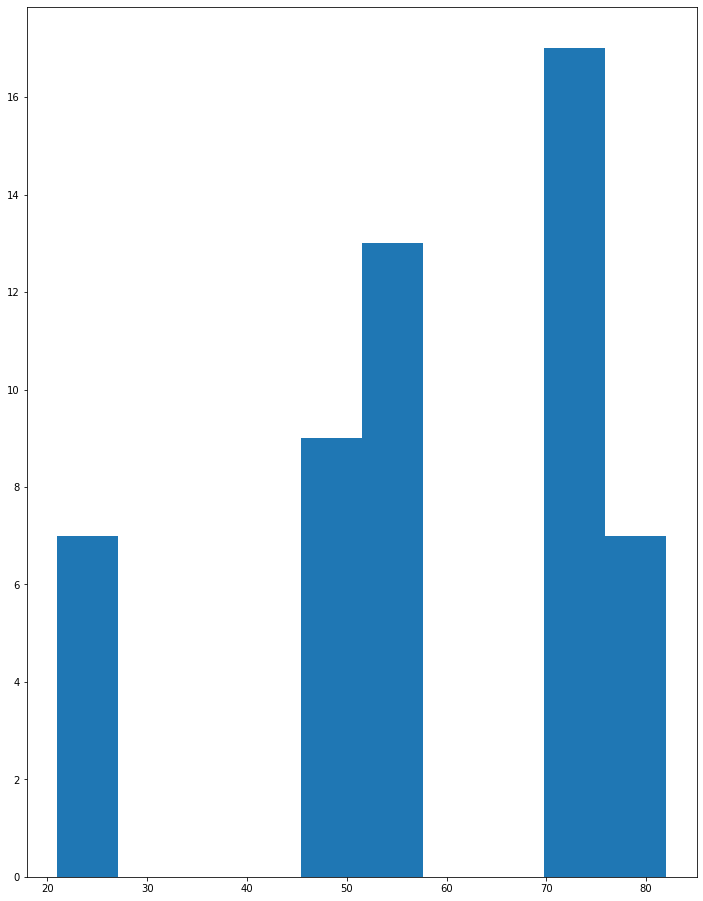

In [116]:
temp = training["organ"] == "spleen"
plt.hist(list(training[temp]["age"]))

In [19]:
rle = list(training[training["organ"] == "spleen"]["rle"])

In [49]:
training[training["organ"] == "spleen"]["age"]

2      82.0
4      21.0
8      50.0
12     74.0
14     21.0
15     21.0
19     74.0
24     57.0
31     74.0
34     72.0
48     50.0
59     74.0
94     74.0
98     50.0
99     57.0
100    21.0
101    72.0
105    82.0
114    82.0
116    82.0
126    50.0
134    57.0
139    82.0
140    50.0
165    50.0
170    74.0
180    50.0
195    74.0
196    21.0
202    70.0
209    21.0
211    72.0
215    70.0
216    50.0
226    57.0
232    57.0
242    74.0
243    57.0
244    74.0
249    57.0
252    74.0
256    21.0
264    72.0
272    57.0
278    72.0
293    50.0
307    57.0
313    82.0
321    57.0
334    57.0
335    57.0
340    57.0
344    82.0
Name: age, dtype: float64

In [80]:
spleenPixCounts = []
# spleenMasks
for i in rle:
    pix, mask = getTotalPixelCountAndMaskFromRLE(i)
    spleenPixCounts.append(pix)

In [81]:
spleenAges = list(training[training["organ"] == "spleen"]["age"].astype("int"))

In [82]:
spleenPixCounts

[790411,
 439839,
 1770613,
 789171,
 466124,
 764945,
 1369600,
 3089924,
 1221921,
 731387,
 1269334,
 1064699,
 1567682,
 300411,
 989406,
 1605422,
 1304590,
 398684,
 1010949,
 559740,
 304261,
 1423118,
 322433,
 630231,
 569155,
 224760,
 247088,
 391934,
 559756,
 451895,
 1314869,
 1704265,
 222446,
 281386,
 1265982,
 1561998,
 1627315,
 72701,
 992776,
 503859,
 1088974,
 480273,
 1239919,
 1321565,
 541583,
 360158,
 408682,
 437472,
 1031143,
 771833,
 2332526,
 207996,
 822087]

In [91]:
spleenPixCountsAndAge = list(zip(spleenPixCounts, spleenAges))

In [73]:
from matplotlib.pyplot import figure

figure(figsize=(12, 16), dpi=80)

<Figure size 960x1280 with 0 Axes>

<Figure size 960x1280 with 0 Axes>

In [75]:

plt.rcParams["figure.figsize"] = (12,16)

In [93]:
ageGroups = {}
for i in spleenAges:
    if i not in ageGroups:
        ageGroups[i] = []
ageGroups
for i in spleenPixCountsAndAge:
    ageGroups[i[1]].append(i[0])

In [94]:
ageGroups

{82: [790411, 398684, 1010949, 559740, 322433, 437472, 822087],
 21: [439839, 466124, 764945, 1605422, 559756, 1314869, 480273],
 50: [1770613,
  1269334,
  300411,
  304261,
  630231,
  569155,
  247088,
  281386,
  360158],
 74: [789171,
  1369600,
  1221921,
  1064699,
  1567682,
  224760,
  391934,
  1627315,
  992776,
  1088974],
 57: [3089924,
  989406,
  1423118,
  1265982,
  1561998,
  72701,
  503859,
  1321565,
  408682,
  1031143,
  771833,
  2332526,
  207996],
 72: [731387, 1304590, 1704265, 1239919, 541583],
 70: [451895, 222446]}

In [103]:
from collections import OrderedDict

In [107]:
ageGroups

OrderedDict([(21, [439839, 466124, 764945, 1605422, 559756, 1314869, 480273]),
             (50,
              [1770613,
               1269334,
               300411,
               304261,
               630231,
               569155,
               247088,
               281386,
               360158]),
             (57,
              [3089924,
               989406,
               1423118,
               1265982,
               1561998,
               72701,
               503859,
               1321565,
               408682,
               1031143,
               771833,
               2332526,
               207996]),
             (70, [451895, 222446]),
             (72, [731387, 1304590, 1704265, 1239919, 541583]),
             (74,
              [789171,
               1369600,
               1221921,
               1064699,
               1567682,
               224760,
               391934,
               1627315,
               992776,
               1088974]),
          

In [123]:
zz

[[439839, 466124, 764945, 1605422, 559756, 1314869, 480273],
 [1770613, 1269334, 300411, 304261, 630231, 569155, 247088, 281386, 360158],
 [3089924,
  989406,
  1423118,
  1265982,
  1561998,
  72701,
  503859,
  1321565,
  408682,
  1031143,
  771833,
  2332526,
  207996],
 [451895, 222446],
 [731387, 1304590, 1704265, 1239919, 541583],
 [789171,
  1369600,
  1221921,
  1064699,
  1567682,
  224760,
  391934,
  1627315,
  992776,
  1088974],
 [790411, 398684, 1010949, 559740, 322433, 437472, 822087]]

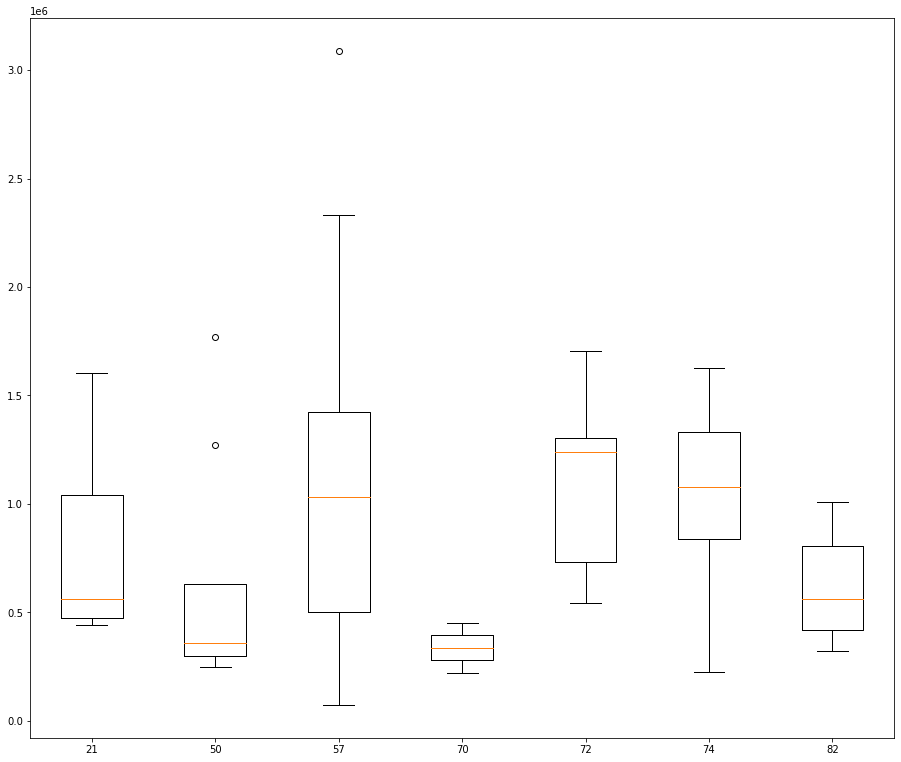

In [122]:
ageGroups = OrderedDict(sorted(ageGroups.items()))

allNumes = []
zz = []
for i in ageGroups:
    zz.append(ageGroups[i])
    allNumes.extend(ageGroups[i])
allNumes.sort()

fig = plt.figure(figsize = (12, 10))
ax = fig.add_axes([0, 0, 1,1,])
bp = ax.boxplot(zz)
# plt.xlabel(list(ageGroups.keys()))
ax.set_xticklabels(ageGroups.keys())
# ax.set_yticklabels(allNumes)
plt.show()

In [37]:
np.arange(4, 10)

array([4, 5, 6, 7, 8, 9])

In [79]:
def getTotalPixelCountAndMaskFromRLE(rle):
    first = rle.split()
    # first is just a string here
    totalPix = 0
    mask = []
    for i in range(0, len(first), 2):
        # print(first[i], first[i + 1])
        totalPix = totalPix + int(first[i + 1])
        mask.extend(np.arange(int(first[i]), int(first[i]) + int(first[i+1])))
    return int(totalPix), mask

In [28]:
for x in range(2, 6):
    print(x)

2
3
4
5
